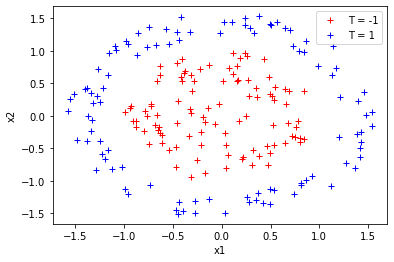

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

data = pd.read_csv('Question3.csv', header = None)
data.columns = ['x1', 'x2', 'T']
data['T'] = data['T'].map({0:-1, 1:1})

set1 = data[(data['T'] == -1)]
x1 = set1.iloc[:]['x1']
y1 = set1.iloc[:]['x2']

set2 = data[(data['T'] == 1)]
x2 = set2.iloc[:]['x1']
y2 = set2.iloc[:]['x2']

plt.plot(x1, y1, 'r+', label = 'T = -1')
plt.plot(x2, y2, 'b+', label = 'T = 1')
plt.legend(loc = "upper right")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()



In [5]:
L = len(data)
X1 = np.zeros(L)
X2 = np.zeros(L)
Target = np.zeros(L)
Point = []
for i in range(L):
    X1[i] = data.iloc[i]['x1']
    X2[i] = data.iloc[i]['x2']
    Target[i] = data.iloc[i]['T']
    Point.append([X1[i], X2[i], Target[i]])



In [194]:
alpha = 0.03
n = 8
a = 0.5
bias = a
V = [a for i in range(n)]

b = np.ones(n)
W = np.random.rand(n, 2)


In [195]:
Znet = np.zeros(n)
Z = np.zeros(n)
Ynet = 0
Y = 0

epoch = 6000
for i in range(epoch):
    c = random.choice(Point)
    for j in range(n):
        Znet[j] = b[j] + np.dot(c[0:2], W[j])
        if (Znet[j] >= 0):
            Z[j] = 1
        else:
            Z[j] = -1
    
    Ynet = bias + np.dot(V, Z)
    if (Ynet >= 0):
        Y = 1
    else:
        Y = -1  
    if (Y != c[-1]):
        if (c[-1] == 1):
            abs_net = list(map(abs, Znet))
            k = abs_net.index(min(abs_net))
            b[k] = b[k] + alpha*(1 - Znet[k])
            W[k] = [W[k][0] + alpha*(1 - Znet[k])*c[0], W[k][1] + alpha*(1 - Znet[k])*c[1]]
        else:
            for l in range(n):
                if (Znet[l] > 0):
                    b[l] = b[l] + alpha*(-1 - Znet[l])
                    W[l] = [W[l][0] + alpha*(-1 - Znet[l])*c[0], W[l][1] + alpha*(-1 - Znet[l])*c[1]]


In [196]:
count = 0
L = len(data)
for i in range(L):
    p = Point[i]
    for j in range(n):
        Znet[j] = b[j] + np.dot(p[0:2], W[j])
        if (Znet[j] >= 0):
            Z[j] = 1
        else:
            Z[j] = -1
    
    Ynet = bias + np.dot(V, Z)
    if (Ynet >= 0):
        Y = 1
    else:
        Y = -1
    if(Y != p[-1]):
        count = count + 1
print(((L- count)/L)*100)

97.0


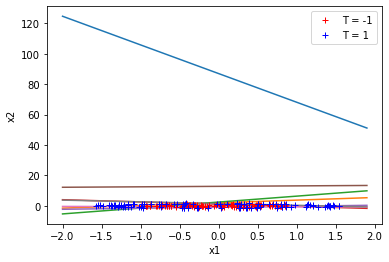

In [197]:
Line = [[] for i in range(n)]
_x1_ = np.arange(-2, 2, 0.1)
for i in range(n):
    Line[i] = -(b[i])/(W[i][1])-(W[i][0])/(W[i][1])*_x1_
    plt.plot(_x1_, Line[i])

plt.plot(x1, y1, 'r+', label = 'T = -1')
plt.plot(x2, y2, 'b+', label = 'T = 1')
plt.legend(loc = "upper right")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
